## Lexy Feldmann<br>Adult Income EDA

#### 1. Load the necessary libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 2. Read the adult income dataset from the following URL: https://packt.live/2N9lRUU

In [2]:
# Read in the dataset
income_data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Wrangling-Workshop/master/Chapter04/datasets/adult_income_data.csv")

#### 3. Create a script that will read a text file line by line.

In [5]:
# Create the list variable that will store the column names
column_names = []

# Open the local text file from URL
import requests

# Read the text file content from URL
url = "https://raw.githubusercontent.com/lexyfeldmann/adult-income-eda/refs/heads/main/adult_income_names.txt"
response = requests.get(url)
lines = response.text.splitlines()

# Loop through each line in the file content
for line in lines:
    # Split the line at the ':' and grab the first part (column name)
    first_part = line.split(":")[0].strip()
    
    # Add to the list if it's not empty
    if first_part != '':
        column_names.append(first_part)

# View the column names list
column_names


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

#### 4. Add a name of Income for the response variable to the dataset.

In [6]:
# Add the column name Income to the column names list
column_names.append('Income')

In [7]:
# Add the column names back to the dataset
income_cleaned = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Wrangling-Workshop/master/Chapter04/datasets/adult_income_data.csv', names = column_names)

# Print first 5 rows to see column headers in action
income_cleaned.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


#### 5. Find the missing values.

In [8]:
# Use isnull() to find null values and sum() to count how many missing values there are in each column
income_cleaned.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

#### 6. Create a DataFrame with only age, education, and occupation by using subsetting.

In [9]:
# Create new dataframe using subsetting that only has columns age, education and occupation
income_subset = income_cleaned[['age', 'education', 'occupation']]

#### 7. Plot a histogram of age with a bin size of 20.

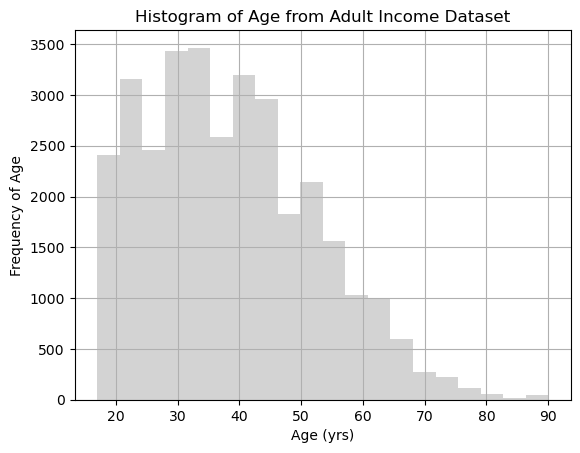

In [10]:
# Create histogram of age and set bin size to 20
income_subset.hist(['age'], color='lightgray', bins=20) # Make the bars the color light gray

# Add title to the histogram
plt.title('Histogram of Age from Adult Income Dataset')

# Add axis labels and show the plot
plt.xlabel('Age (yrs)')
plt.ylabel('Frequency of Age')
plt.show()

#### 8. Create a function to strip the whitespace of characters.

In [11]:
# Simple function that takes in a column and removes the whitespace of characters using the strip() function
def strip_whitespace(column):
    return column.strip()

#### 9. Use the apply method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

In [12]:
# For the workclass column
# Create new column called 'workclass_cleaned' that houses the stripped workclass column
income_subset['workclass_cleaned'] = income_cleaned['workclass'].apply(strip_whitespace)

# Copy the values from the new stripped column to the old column
income_subset['workclass'] = income_subset['workclass_cleaned']

# Drop the stripped column (no longer needed)
income_subset.drop(labels = ['workclass_cleaned'], axis = 1, inplace = True)

C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\1781467783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['workclass_cleaned'] = income_cleaned['workclass'].apply(strip_whitespace)
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\1781467783.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['workclass'] = income_subset['workclass_cleaned']
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\1781467783.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

In [13]:
# For the education column
# Create new column called 'education_cleaned' that houses the stripped education column
income_subset['education_cleaned'] = income_cleaned['education'].apply(strip_whitespace)

# Copy the values from the new stripped column to the old column
income_subset['education'] = income_subset['education_cleaned']

# Drop the stripped column (no longer needed)
income_subset.drop(labels = ['education_cleaned'], axis = 1, inplace = True)

C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\332830172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['education_cleaned'] = income_cleaned['education'].apply(strip_whitespace)
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\332830172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['education'] = income_subset['education_cleaned']
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\332830172.py:9: SettingWithCopyWarning: 
A value is trying to be set on a co

In [14]:
# For the marital-status column
# Create new column called 'marital-status_cleaned' that houses the stripped marital-status column
income_subset['marital-status_cleaned'] = income_cleaned['marital-status'].apply(strip_whitespace)

# Copy the values from the new stripped column to the old column
income_subset['marital-status'] = income_subset['marital-status_cleaned']

# Drop the stripped column (no longer needed)
income_subset.drop(labels = ['marital-status_cleaned'], axis = 1, inplace = True)

C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\768288020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['marital-status_cleaned'] = income_cleaned['marital-status'].apply(strip_whitespace)
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\768288020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['marital-status'] = income_subset['marital-status_cleaned']
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\768288020.py:9: SettingWithCopyWarning: 
A value is tryi

In [15]:
# For the occupation column
# Create new column called 'occupation_cleaned' that houses the stripped occupation column
income_subset['occupation_cleaned'] = income_cleaned['occupation'].apply(strip_whitespace)

# Copy the values from the new stripped column to the old column
income_subset['occupation'] = income_subset['occupation_cleaned']

# Drop the stripped column (no longer needed)
income_subset.drop(labels = ['occupation_cleaned'], axis = 1, inplace = True)

C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\1851268613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['occupation_cleaned'] = income_cleaned['occupation'].apply(strip_whitespace)
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\1851268613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['occupation'] = income_subset['occupation_cleaned']
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\1851268613.py:9: SettingWithCopyWarning: 
A value is trying to be set 

In [16]:
# For the relationship column
# Create new column called 'relationship_cleaned' that houses the stripped relationship column
income_subset['relationship_cleaned'] = income_cleaned['relationship'].apply(strip_whitespace)

# Copy the values from the new stripped column to the old column
income_subset['relationship'] = income_subset['relationship_cleaned']

# Drop the stripped column (no longer needed)
income_subset.drop(labels = ['relationship_cleaned'], axis = 1, inplace = True)

C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\2298091279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['relationship_cleaned'] = income_cleaned['relationship'].apply(strip_whitespace)
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\2298091279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['relationship'] = income_subset['relationship_cleaned']
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\2298091279.py:9: SettingWithCopyWarning: 
A value is trying to

In [17]:
# For the sex column
# Create new column called 'sex_cleaned' that houses the stripped sex column
income_subset['sex_cleaned'] = income_cleaned['sex'].apply(strip_whitespace)

# Copy the values from the new stripped column to the old column
income_subset['sex'] = income_subset['sex_cleaned']

# Drop the stripped column (no longer needed)
income_subset.drop(labels = ['sex_cleaned'], axis = 1, inplace = True)

C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\534782067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['sex_cleaned'] = income_cleaned['sex'].apply(strip_whitespace)
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\534782067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['sex'] = income_subset['sex_cleaned']
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\534782067.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [18]:
# For the native-country column
# Create new column called 'native-country_cleaned' that houses the stripped native-country column
income_subset['native-country_cleaned'] = income_cleaned['native-country'].apply(strip_whitespace)

# Copy the values from the new stripped column to the old column
income_subset['native-country'] = income_subset['native-country_cleaned']

# Drop the stripped column (no longer needed)
income_subset.drop(labels = ['native-country_cleaned'], axis = 1, inplace = True)

C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\1923027584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['native-country_cleaned'] = income_cleaned['native-country'].apply(strip_whitespace)
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\1923027584.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['native-country'] = income_subset['native-country_cleaned']
C:\Users\ld718712\AppData\Local\Temp\ipykernel_13800\1923027584.py:9: SettingWithCopyWarning: 
A value is t

#### 10. Find the number of people who are aged between 30 and 50.

In [19]:
# Variable that will be used to increment by 1 every time a person between the age of 30 and 50 is found
num_people = 0

# Loop through the values in the age column of the dataset
for value in income_subset['age']:
    # If the age is between 30 and 50 (inclusive), add one to the count
    if value >= 30 and value <= 50:
        num_people += 1

# Print the number of people found between the age of 30 and 50
print('Number of people who are aged between 30 and 50:', num_people)

Number of people who are aged between 30 and 50: 16390


#### 11. Group the records based on age and education to find how the mean age is distributed.

In [23]:
# Group by age and education using grouby()
income_by_age = income_subset.groupby(['age', 'education'])


# Group by age and education, take mean of numeric columns only
income_by_age.mean(numeric_only=True).reset_index()

,age,education
0,17,10th
1,17,11th
2,17,12th
3,17,5th-6th
4,17,7th-8th
...,...,...
960,90,Bachelors
961,90,HS-grad
962,90,Masters
963,90,Prof-school


#### 12. Group by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile.

In [24]:
# Groupby occupation using the groupby() function and get the summary statistics of age by using the describe() function
# and point to the column 'age'
income_subset.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [25]:
# Create a dataframe to hold the income data grouped by occupation and desribed by age
stats = income_subset.groupby('occupation').describe()['age']

# Grab the max mean and the ID (occupation) it is associated with
oldest_workers = stats['mean'].idxmax()

# Print the answer
print('Profession with oldest workers on average:', oldest_workers)

Profession with oldest workers on average: Exec-managerial


In [26]:
# Keep all rows except for the top row that has occupation as a question mark
stats = stats[1:]

# Grab the max 75% percentile and the ID (occupation) it is associated with
largest_share_75 = stats['75%'].idxmax()

# Print the answer
print('Profession with the largest share of the workforce above the 75th percentile:', largest_share_75)

Profession with the largest share of the workforce above the 75th percentile: Priv-house-serv


#### 13. Use subset and groupBy to find the outliers.

In [27]:
# Use the describe method again to find outliers when grouping by occupation as the describe method automatically includes
# info about outliers
stats_df = income_subset.groupby('occupation').describe()['age']

#### 14. Plot the outlier values on a bar chart.

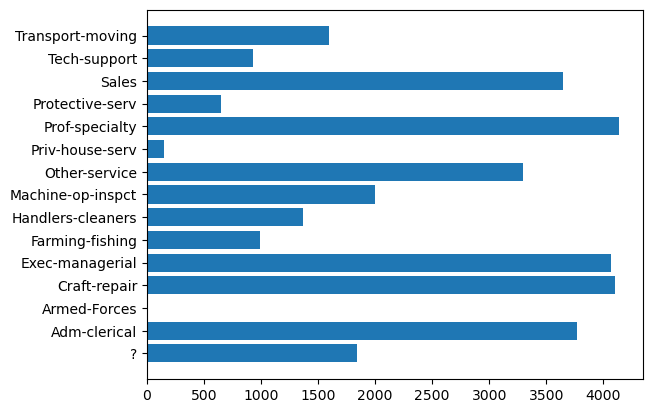

In [28]:
# Plot the outlier values found using barh() associated with each occupation, to see the number of data points for each
# occupation
plt.barh(y = stats_df.index, width = stats_df['count'])
plt.show()

#### 15. Merge the two DataFrames using common keys to drop duplicate values.

In [29]:
# Create the first subset dataframe with columns education, age and relationship
first_df = income_cleaned[['education','age','relationship']]

# Create the second subset dataframe with columns age, occupation and Income
second_df = income_cleaned[['age','occupation', 'Income']]

In [30]:
# Merge the two dataframes together using pd.merge and the key column 'age'
merged_dfs = pd.merge(first_df, second_df, on='age', how='inner')

# Drop the duplicate values using drop_duplicates()
merged_dfs.drop_duplicates()

# Show the merged dataframe
merged_dfs

,education,age,relationship,occupation,Income
0,Bachelors,39,Not-in-family,Adm-clerical,<=50K
1,Bachelors,39,Not-in-family,Exec-managerial,<=50K
2,Bachelors,39,Not-in-family,Craft-repair,<=50K
3,Bachelors,39,Not-in-family,Exec-managerial,<=50K
4,Bachelors,39,Not-in-family,?,<=50K
...,...,...,...,...,...
22637498,HS-grad,52,Wife,Exec-managerial,>50K
22637499,HS-grad,52,Wife,Prof-specialty,<=50K
22637500,HS-grad,52,Wife,Other-service,<=50K
22637501,HS-grad,52,Wife,Sales,<=50K
